In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**The time,event,file_number,event_number are not important columns**


In [ ]:
import pandas as pd


file_path = '/content/drive/My Drive/Levine_32dim_notransform.csv'
df = pd.read_csv(file_path)
df.head()
df_original=df
df.columns


Index(['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19',
       'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number','individual'])


len(df.columns)
df.columns

Index(['Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
       'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
       'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
       'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'CD41', 'Viability', 'label'],
      dtype='object')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


null_counts = df_cleaned.isnull().sum()
non_null_counts = df_cleaned.notnull().sum()

print("Null values in the label column are:",null_counts['label'])
print("Non-Null values in the label column are:",non_null_counts['label'])


Null values in the label column are: 161443
Non-Null values in the label column are: 104184


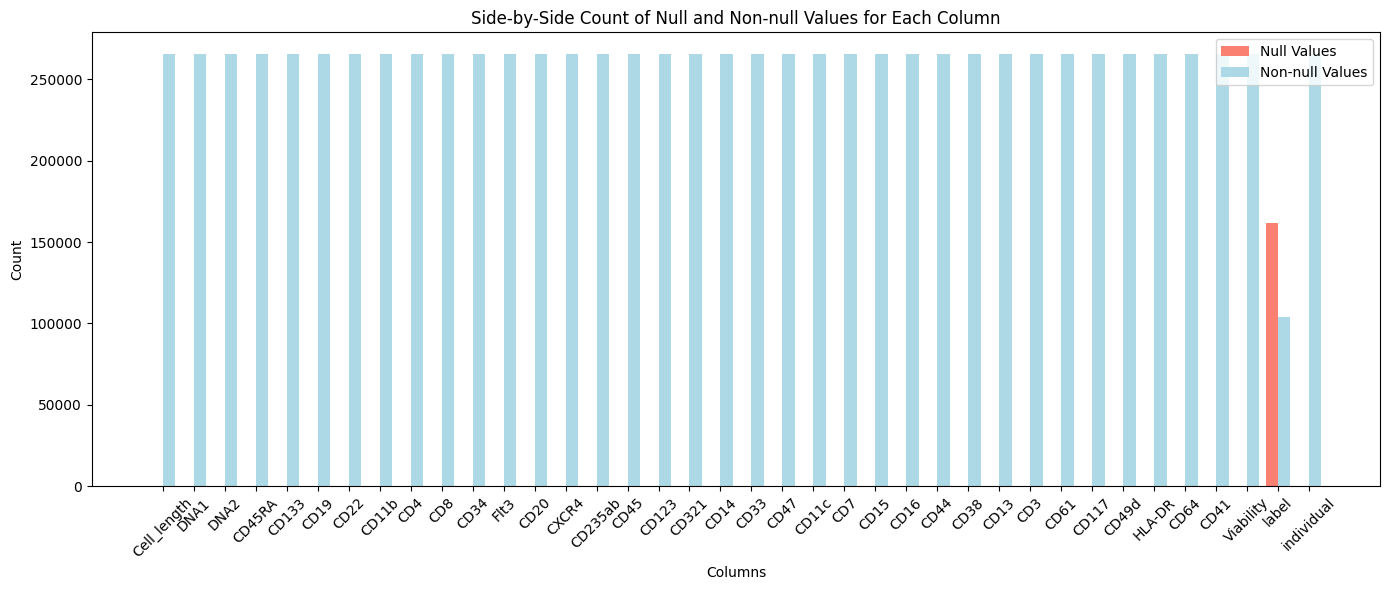

In [ ]:
import numpy as np
columns=df_cleaned.columns
indices = np.arange(len(columns))

bar_width = 0.4

plt.figure(figsize=(14, 6))

plt.bar(indices - bar_width/2, null_counts, width=bar_width, label='Null Values', color='salmon')
plt.bar(indices + bar_width/2, non_null_counts, width=bar_width, label='Non-null Values', color='lightblue')


plt.title('Side-by-Side Count of Null and Non-null Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(indices, columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

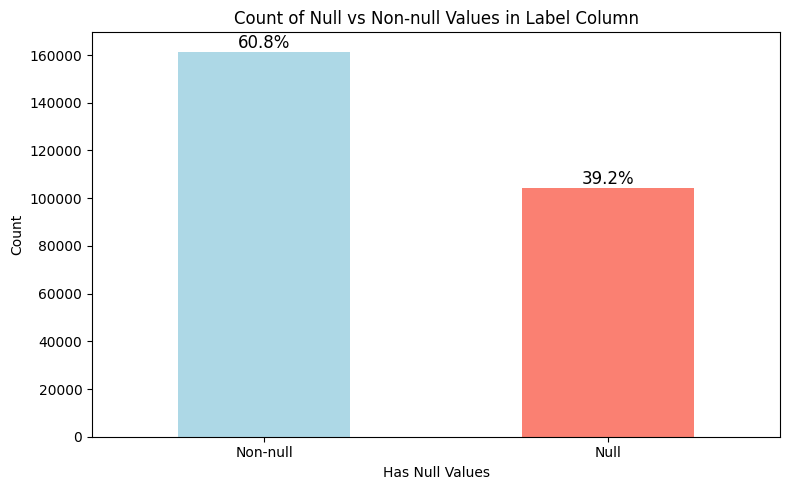

In [ ]:

null_counts = df_cleaned['label'].isnull().value_counts()
total_counts = null_counts.sum()


percentages = (null_counts / total_counts) * 100


plt.figure(figsize=(8, 5))
bars = null_counts.plot(kind='bar', color=['lightblue', 'salmon'], ax=plt.gca())


for bar, percentage in zip(bars.patches, percentages):
    plt.annotate(f'{percentage:.1f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=12)

plt.title('Count of Null vs Non-null Values in Label Column')
plt.xlabel('Has Null Values')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-null', 'Null'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:

df_cleaned = df.drop(columns=[ 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'])


len(df_cleaned.columns)

35

#  Now we will work on reducing the columns


**1.Remove Highly corelated columns**

**2.Low varaiance columns**

**3.The column with more missing data**



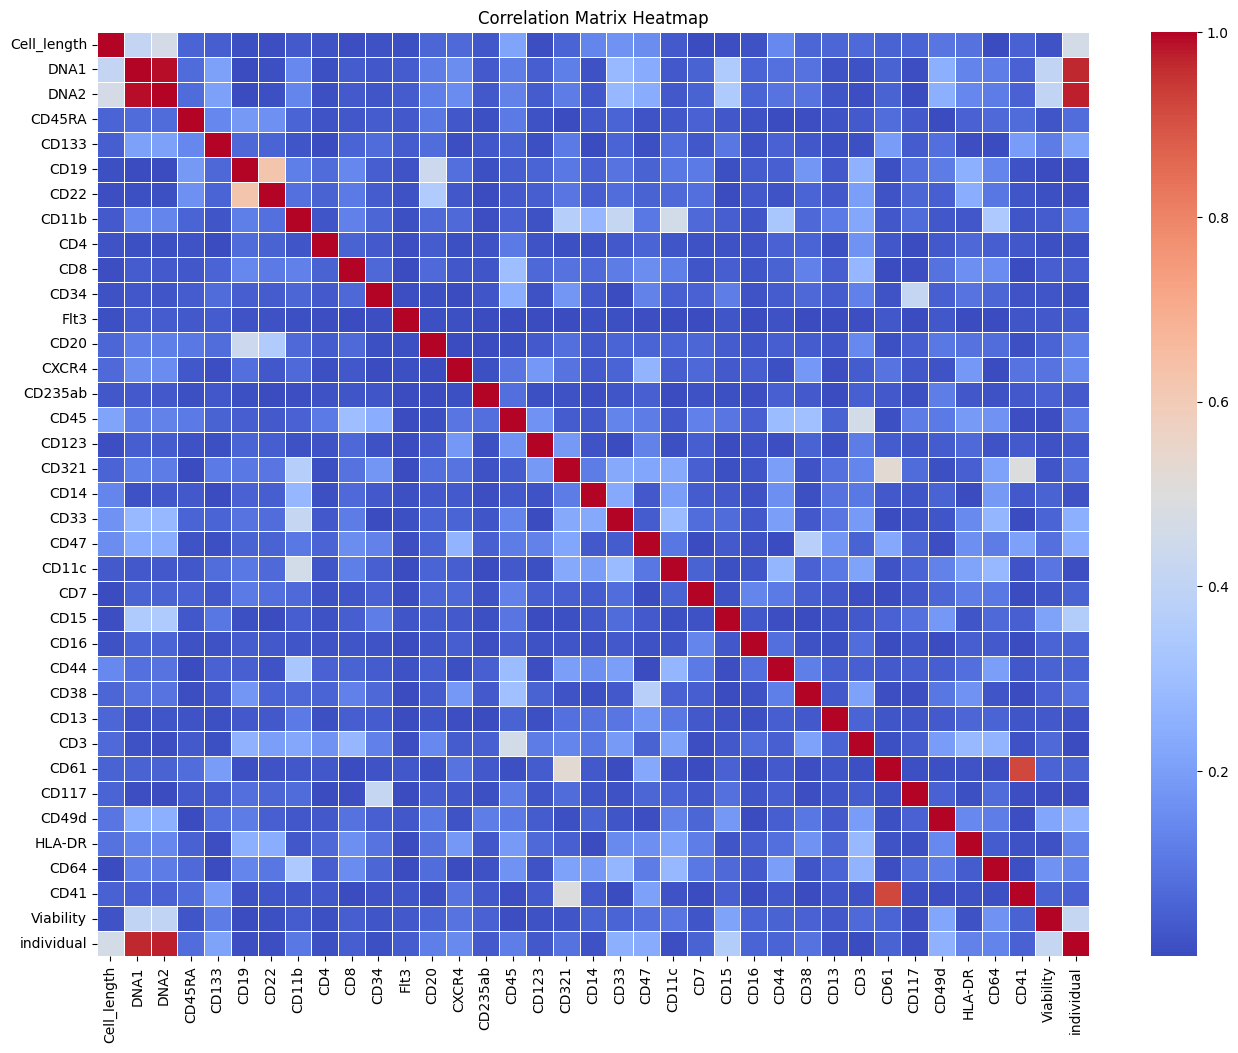

Columns removed due to high correlation: ['DNA2', 'CD41', 'individual']
Remaining columns after correlation removal: 34


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_features = df_cleaned.drop(['label'], axis=1)
#print(len(df_cleaned.columns))

corr_matrix = df_features.corr().abs()


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Features with correlation greater than 0.8/0.9
threshold = 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]


df_reduced_corr = df_features.drop(to_drop, axis=1)


print(f"Columns removed due to high correlation: {to_drop}")
print(f"Remaining columns after correlation removal: {df_reduced_corr.shape[1]}")




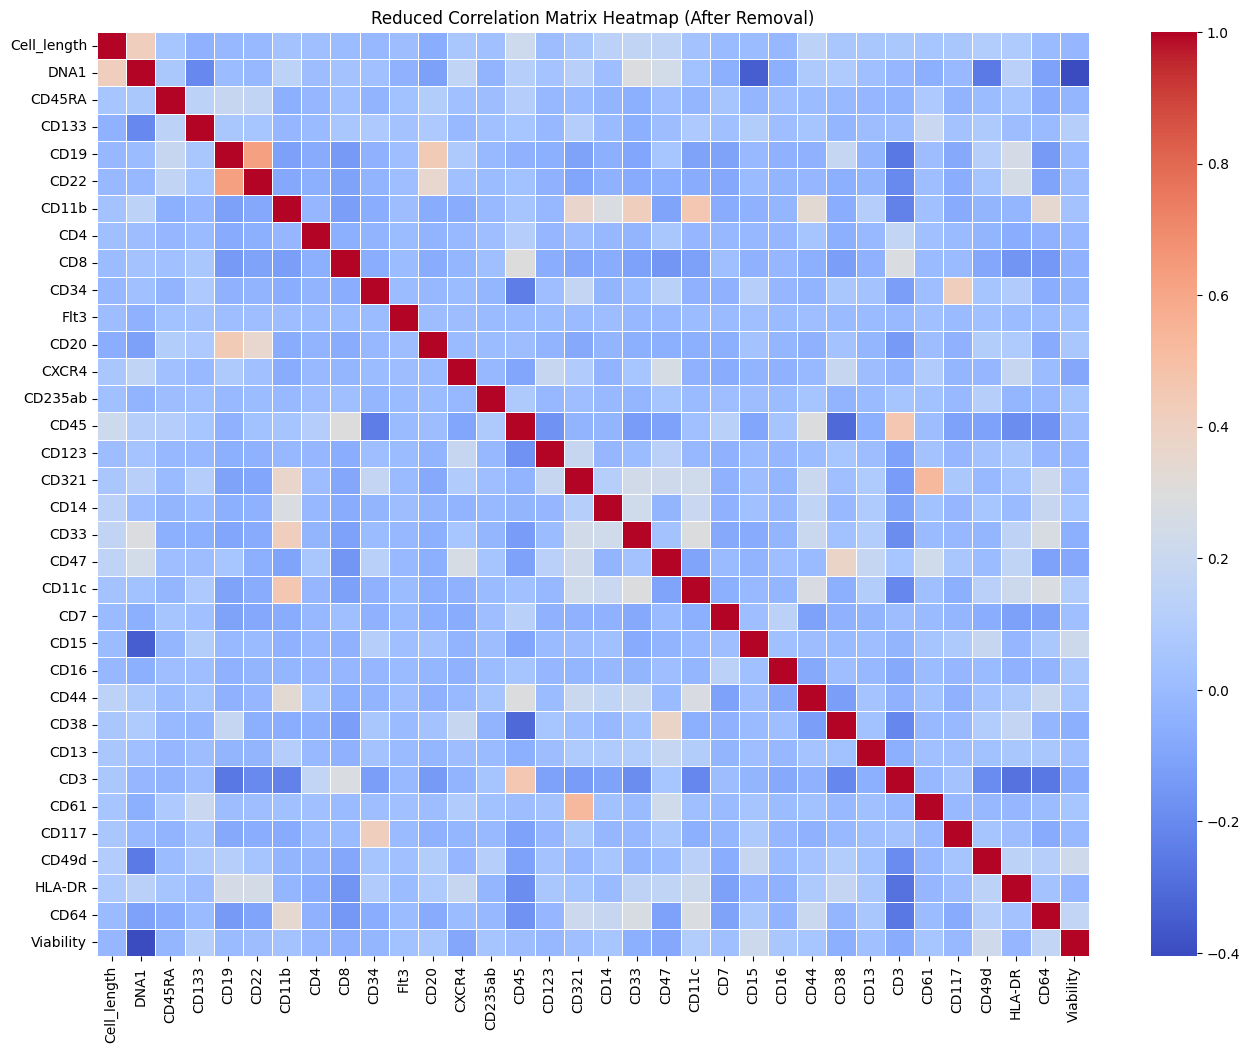

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_reduced_corr.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Reduced Correlation Matrix Heatmap (After Removal)')
plt.show()

The distribution is: label
7.0     26366
10.0    21099
8.0     20108
9.0     16520
13.0     6135
2.0      3905
4.0      3295
3.0      2248
11.0     1238
1.0      1207
6.0       916
14.0      513
12.0      330
5.0       304
Name: count, dtype: int64


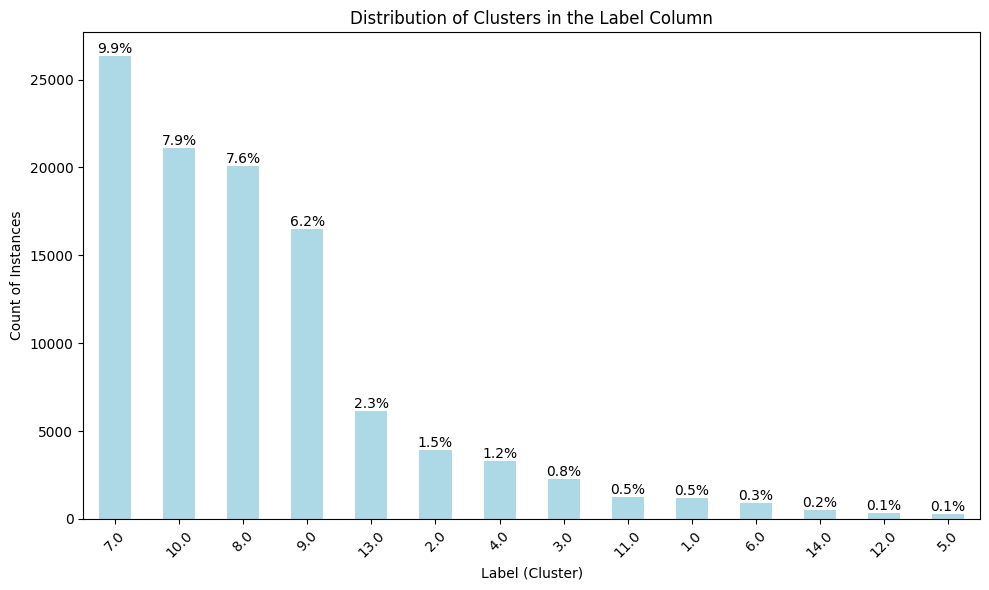

In [ ]:

label_distribution = df['label'].value_counts()

print("The distribution is:",label_distribution)
plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar', color='lightblue')
plt.title('Distribution of Clusters in the Label Column')
plt.xlabel('Label (Cluster)')
plt.ylabel('Count of Instances')


total_count = len(df['label'])
for i, count in enumerate(label_distribution):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                   min          max
Cell_length  10.000000    65.000000
DNA1         40.405746  2745.666504
DNA2         23.133020  4396.652344
CD45RA       -0.286683  2013.210327
CD133        -0.290567   628.772461
CD19         -0.290608   367.355286
CD22         -0.286868   435.604523
CD11b        -0.291343   481.570679
CD4          -0.288916  1804.521118
CD8          -0.290179   273.117188
CD34         -0.290203   430.201294
Flt3         -0.289583  3082.859619
CD20         -0.290826  1061.773926
CXCR4        -0.285367   744.679260
CD235ab      -0.288219  1925.590210
CD45         18.906206  3478.533936
CD123        -0.290179  1913.932373
CD321        -0.267886  2401.089355
CD14         -0.289934   373.294159
CD33         -0.290558   684.539490
CD47         -0.275576  1508.356934
CD11c        -0.290427  1698.035645
CD7          -0.290972  1387.843872
CD15         -0.290547    11.054365
CD16         -0.289060   520.386902
CD44          0.130320  4108.669922
CD38         -0.286126  3675

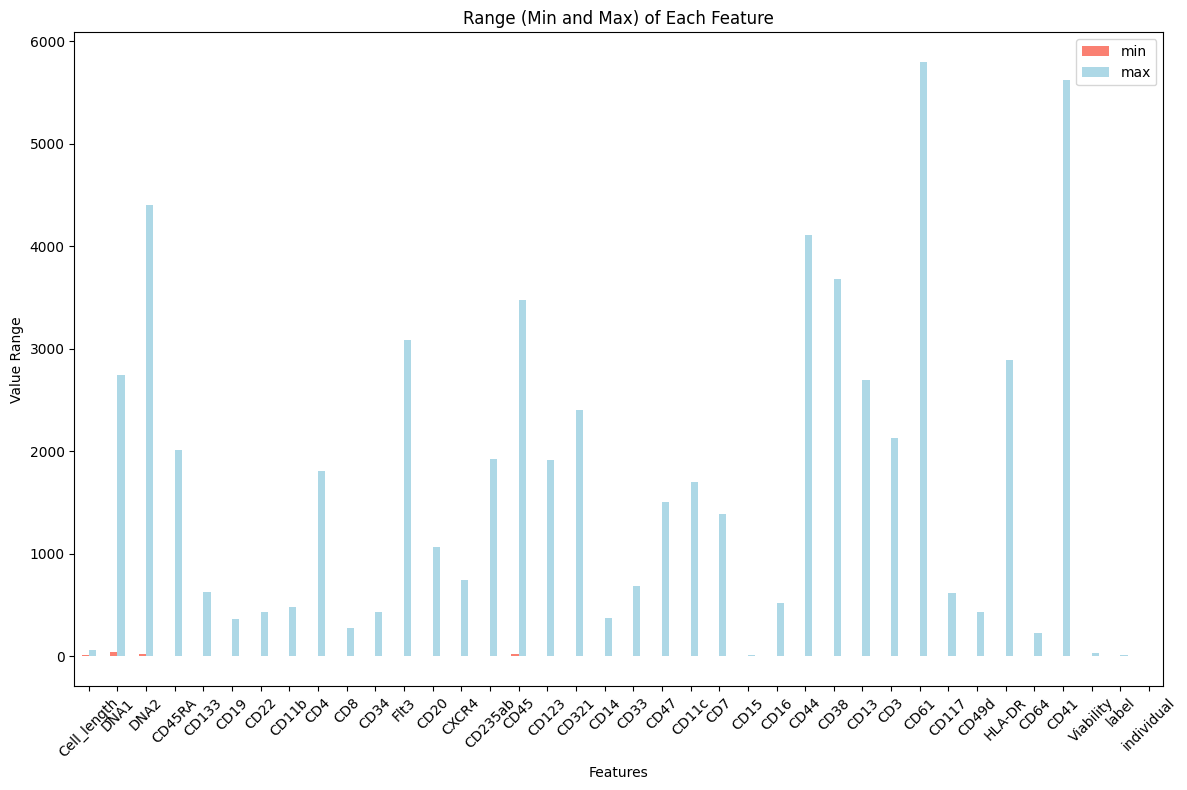

In [ ]:
feature_range = df_cleaned.describe().T[['min', 'max']]
print(feature_range)

plt.figure(figsize=(12, 8))

# Plot the min and max values for each feature as bars
feature_range.plot(kind='bar', y=['min', 'max'], ax=plt.gca(), color=['salmon', 'lightblue'])


plt.title('Range (Min and Max) of Each Feature')
plt.xlabel('Features')
plt.ylabel('Value Range')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

dataset might not have been normalized or preprocessed properly for all features.

CD45         18.906206  3478.533936

DNA1         40.405746  2745.666504

CD44          0.130320  4108.669922(small difference)

Except these 3 all are starts with negative value

Flt3, CD44,CD38 and CD61 have a wide range .

CD15 and Viability have a very narrow range.

In [ ]:
to_drop =['DNA2', 'CD41', 'individual']
df_cleaned_after_corr=df_cleaned.drop(to_drop,axis=1)
print((df_cleaned_after_corr.columns))
print("Total columns are:",len(df_cleaned_after_corr.columns))

Index(['Cell_length', 'DNA1', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b',
       'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45',
       'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15',
       'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
       'HLA-DR', 'CD64', 'Viability', 'label'],
      dtype='object')
Total columns are: 35


Outliers detected in CD61: 26345
Outliers detected in CD44: 12407
Outliers detected in CD38: 39559
Outliers detected in Flt3: 15161


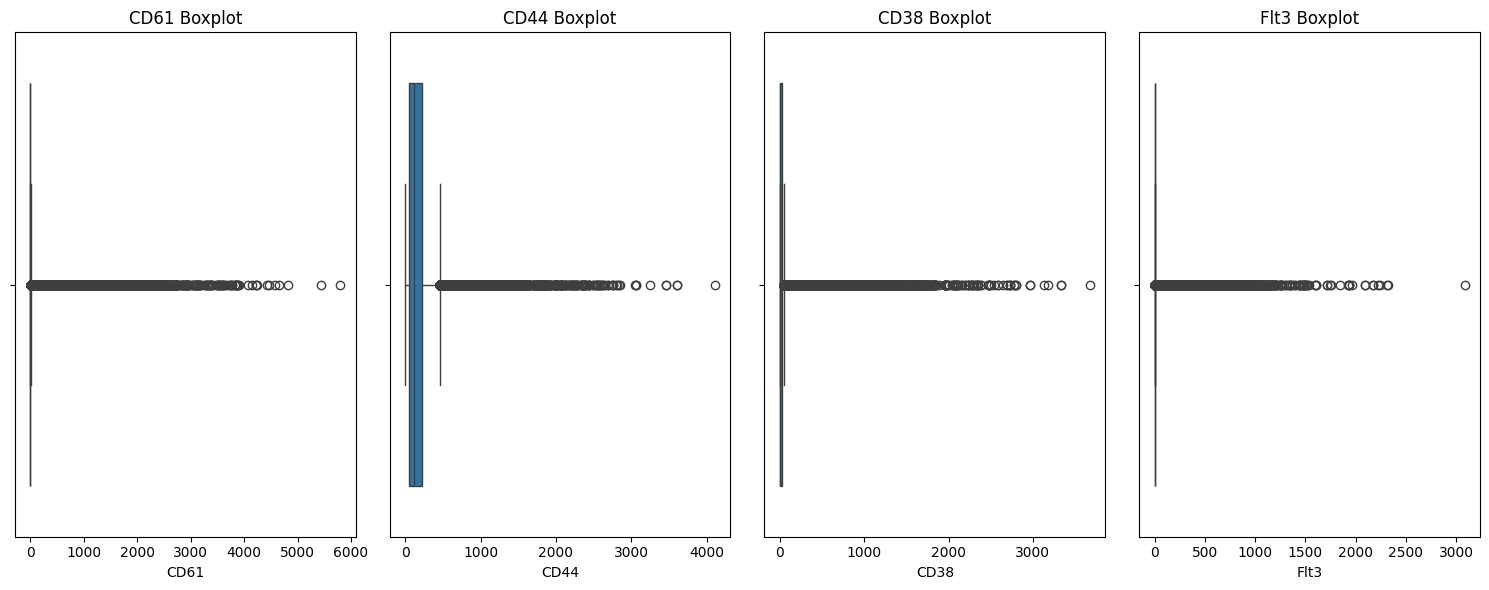

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


features = ['CD61', 'CD44', 'CD38', 'Flt3']


def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"Outliers detected in {feature}: {len(outliers)}")

    return outliers


plt.figure(figsize=(15, 6))

for i, feature in enumerate(features):

    outliers = detect_outliers_iqr(df_cleaned_after_corr, feature)


    plt.subplot(1, len(features), i+1)  # Create a subplot for each feature
    sns.boxplot(x=df_cleaned_after_corr[feature])
    plt.title(f'{feature} Boxplot')

plt.tight_layout()
plt.show()


Outliers detected in Cell_length: 2411
Outliers detected in DNA1: 0
Outliers detected in CD45RA: 17652
Outliers detected in CD133: 21809
Outliers detected in CD19: 49956
Outliers detected in CD22: 38714
Outliers detected in CD11b: 43234
Outliers detected in CD4: 24864
Outliers detected in CD8: 49836
Outliers detected in CD34: 23380
Outliers detected in Flt3: 15161
Outliers detected in CD20: 38016
Outliers detected in CXCR4: 16237
Outliers detected in CD235ab: 11593
Outliers detected in CD45: 3333
Outliers detected in CD123: 29409
Outliers detected in CD321: 18580
Outliers detected in CD14: 29709
Outliers detected in CD33: 33216
Outliers detected in CD47: 13952
Outliers detected in CD11c: 46577
Outliers detected in CD7: 38665
Outliers detected in CD15: 15756
Outliers detected in CD16: 25922
Outliers detected in CD44: 12407
Outliers detected in CD38: 39559
Outliers detected in CD13: 21881
Outliers detected in CD3: 6784
Outliers detected in CD61: 26345
Outliers detected in CD117: 27406
Ou

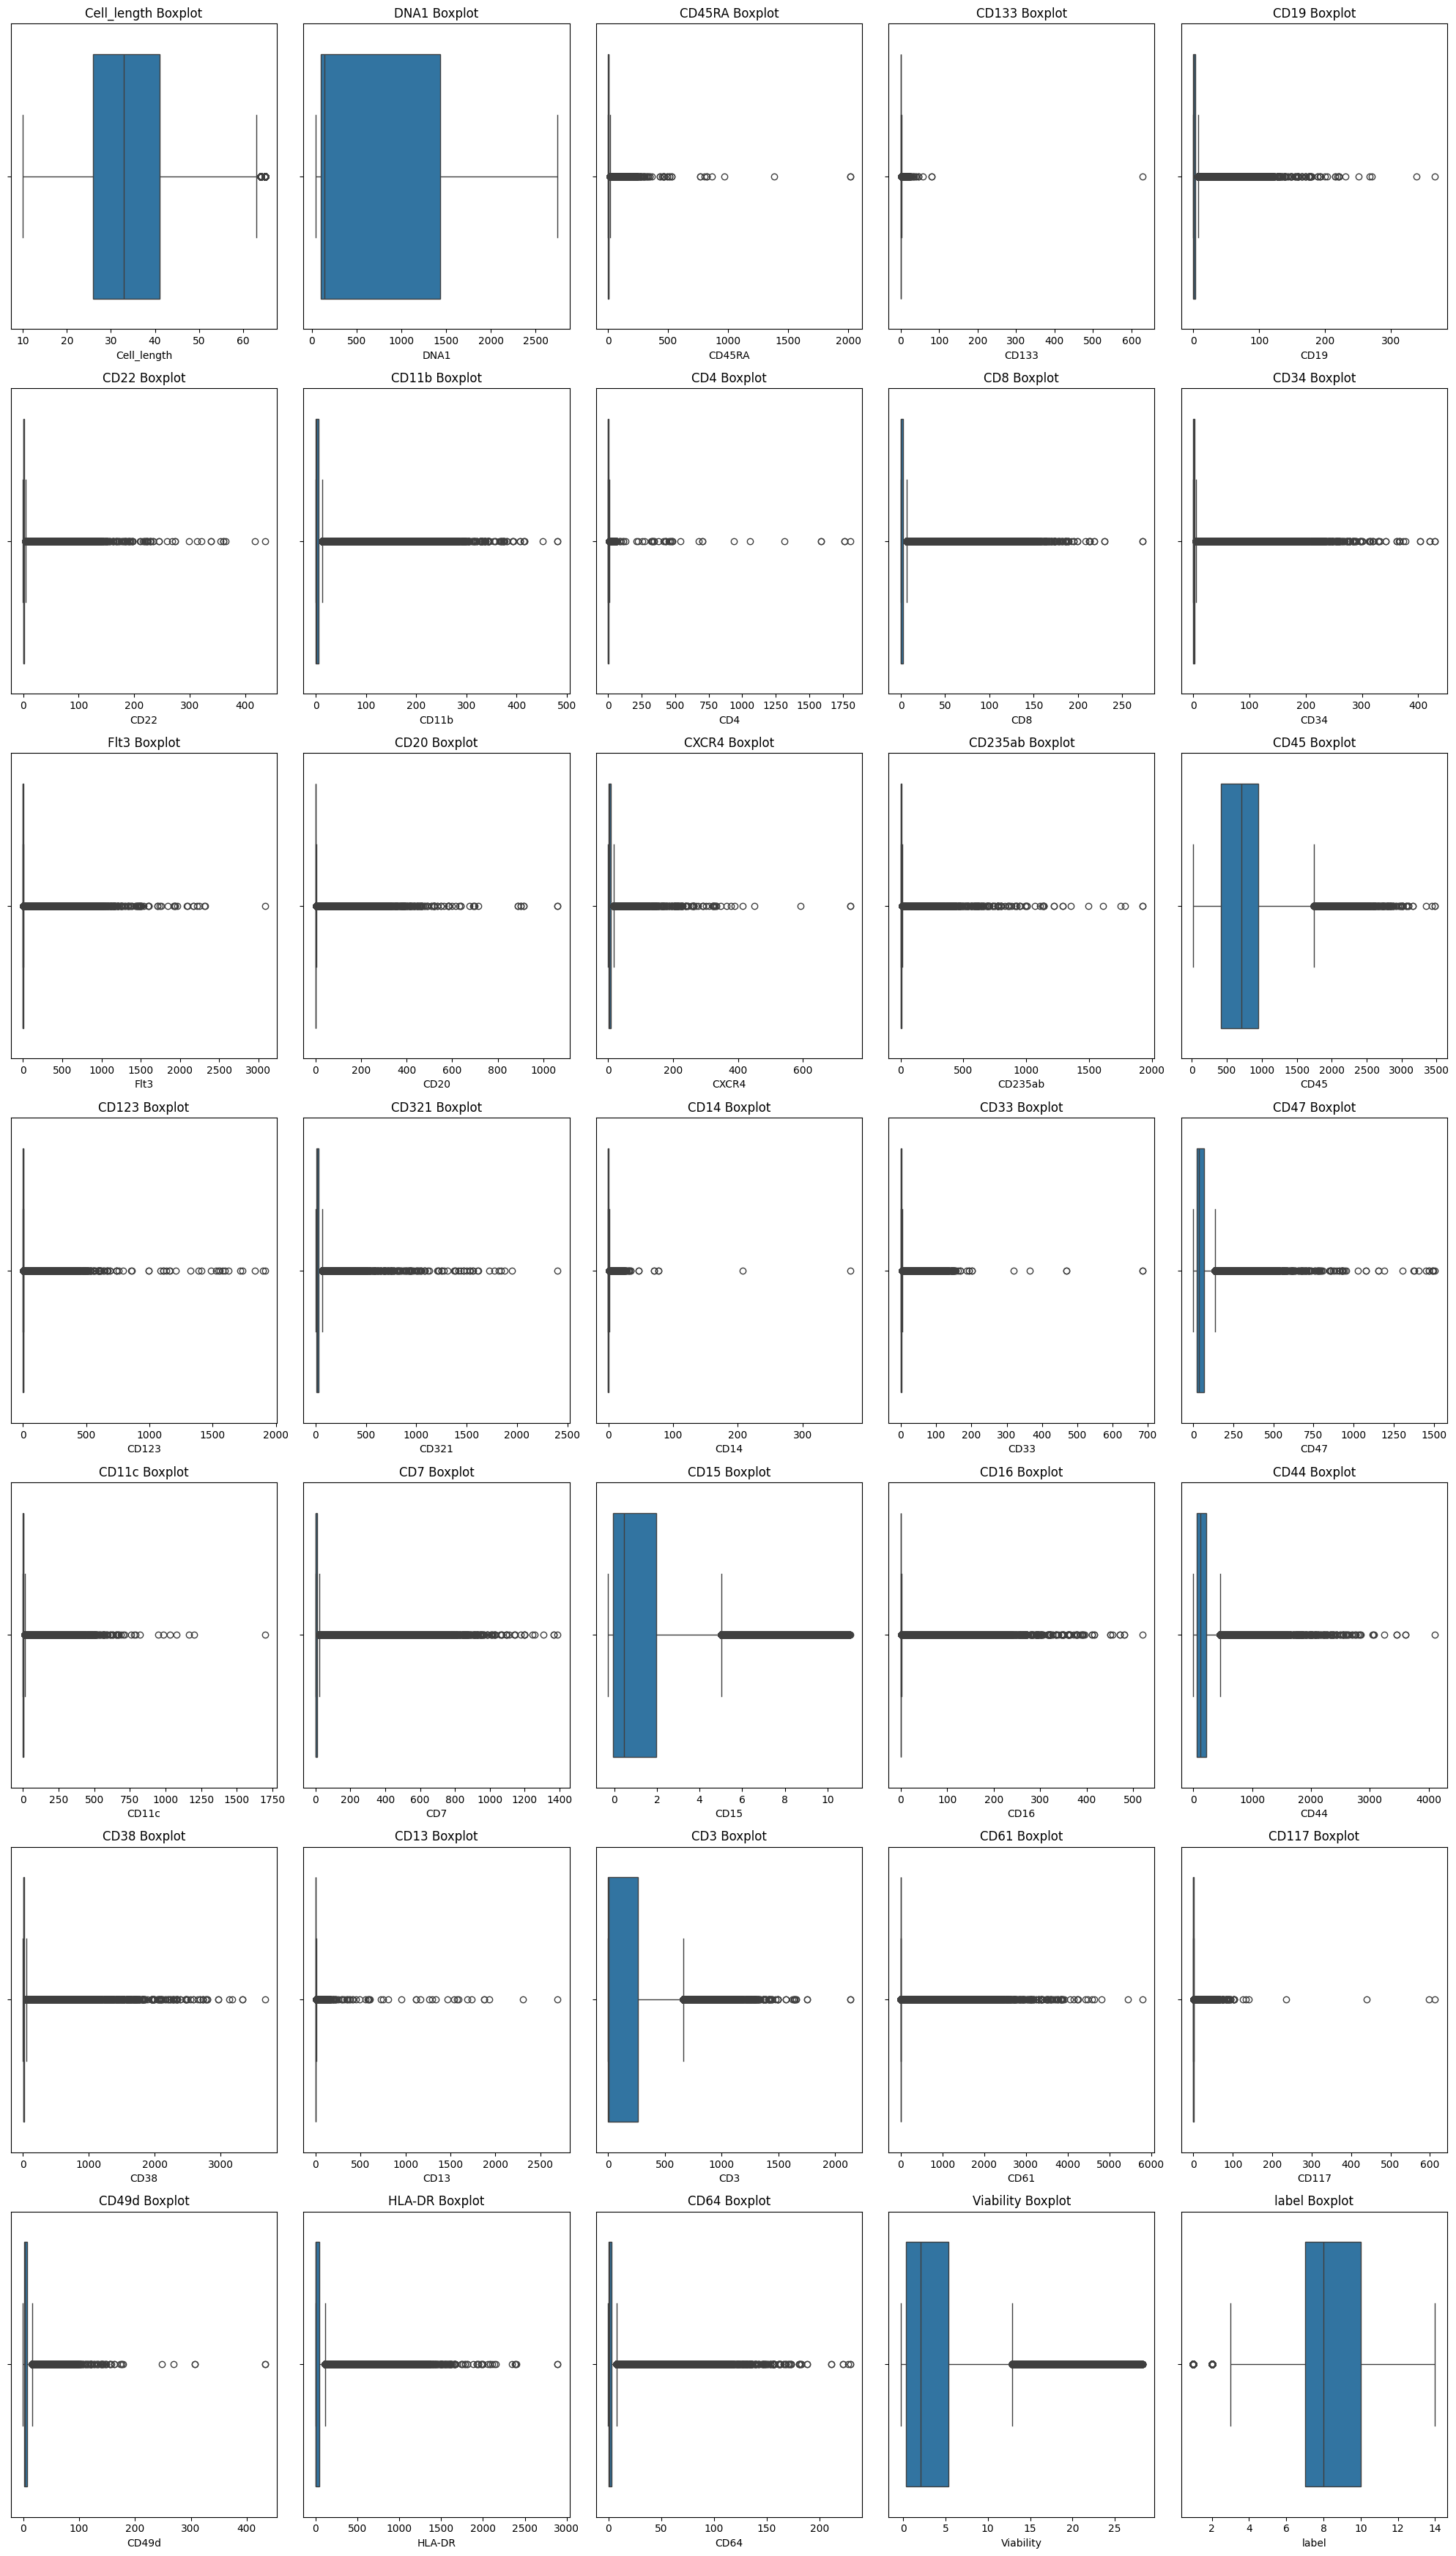

In [ ]:
features=df_cleaned_after_corr.columns
n_cols = 5
n_rows = len(features) // n_cols + (len(features) % n_cols > 0)  # Calculate the number of rows dynamically


plt.figure(figsize=(20, n_rows * 5))

for i, feature in enumerate(features):

    outliers = detect_outliers_iqr(df_cleaned_after_corr, feature)


    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df_cleaned_after_corr[feature])
    plt.title(f'{feature} Boxplot')


plt.tight_layout()
plt.show()

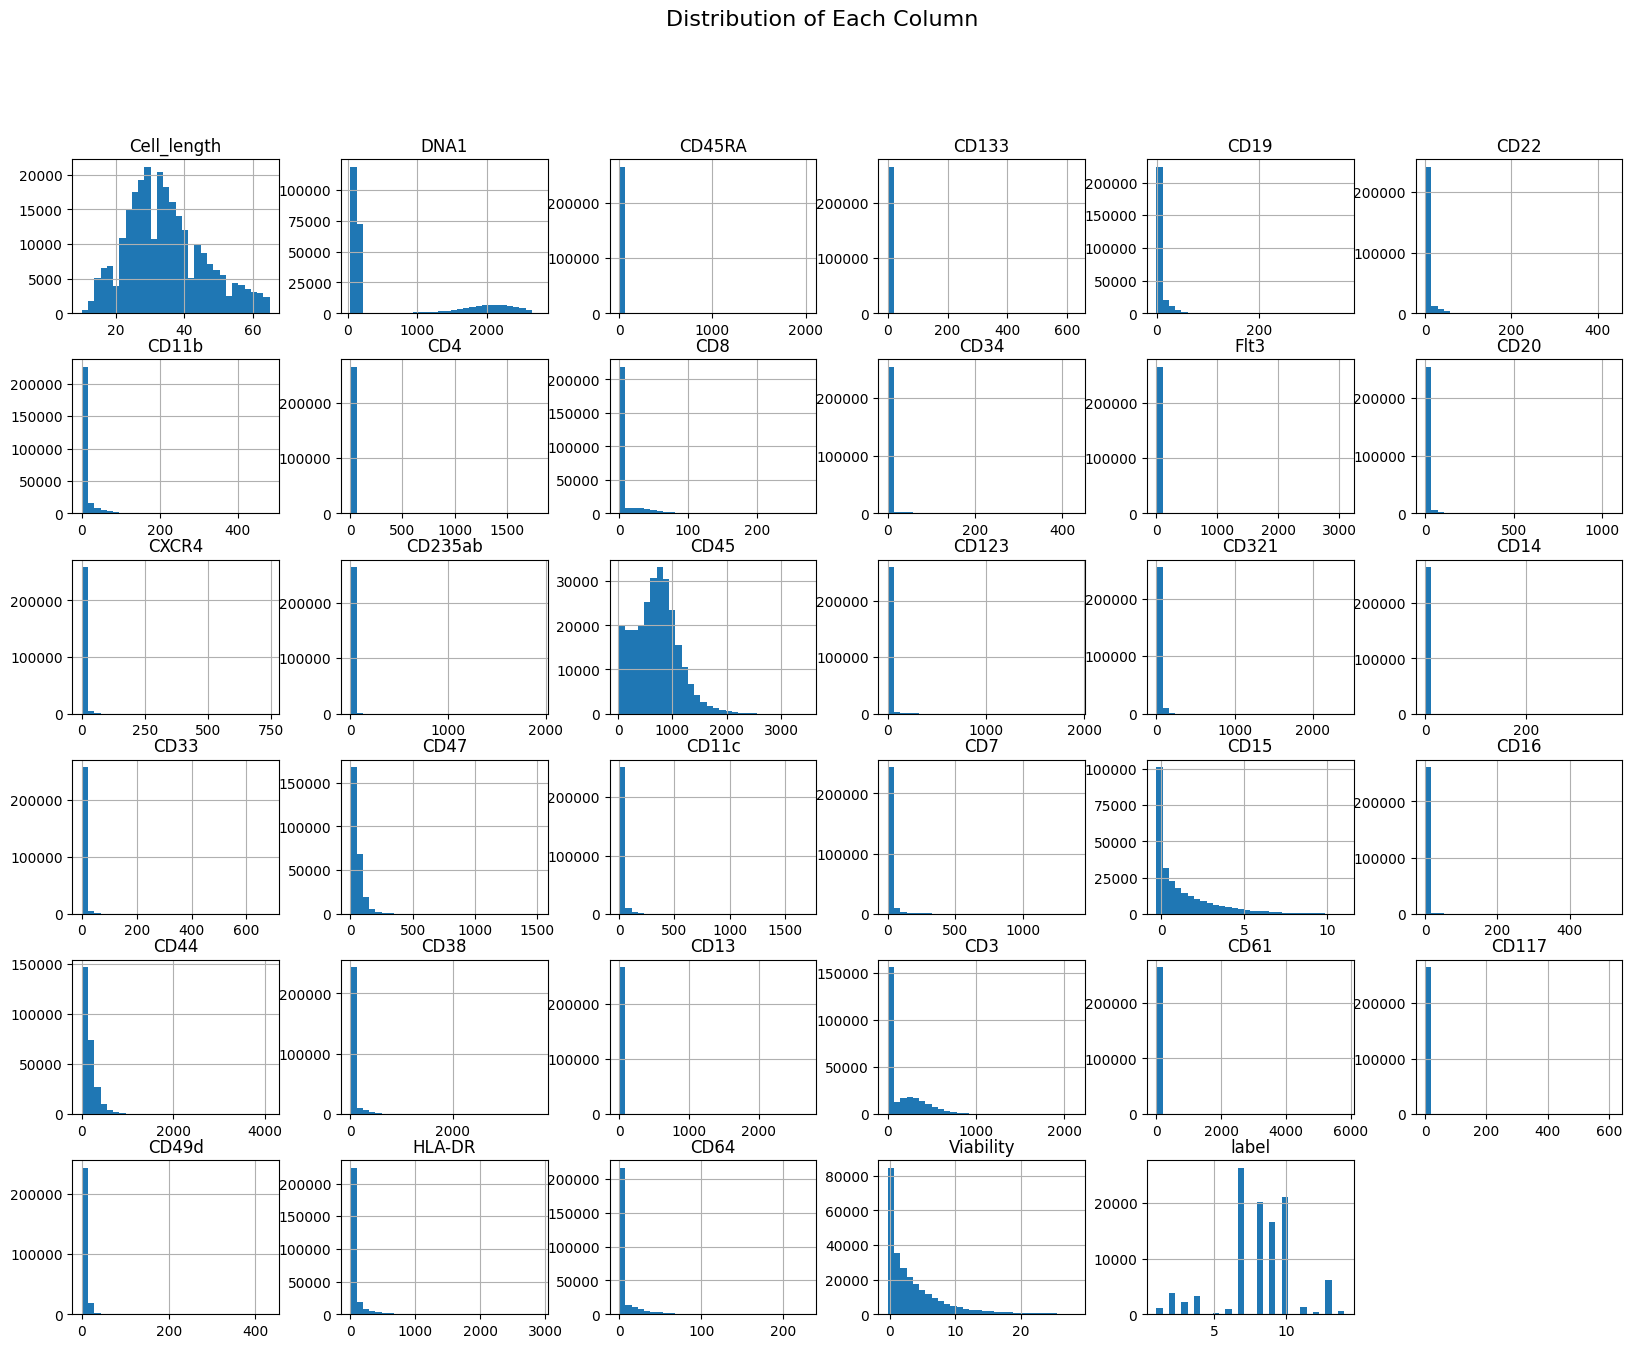

In [ ]:
df_cleaned_after_corr.hist(figsize=(20, 15), bins=30)
plt.suptitle("Distribution of Each Column", fontsize=16)
plt.show()

Skewness: A skewness near zero suggests a normal distribution.
    
Kurtosis: Measures the "tailedness" of the distribution. High kurtosis indicates more outliers.

               Skewness                   Category
Cell_length    0.527832               Right-skewed
DNA1           1.155424               Right-skewed
CD45RA        65.251655               Right-skewed
CD133        126.096395               Right-skewed
CD19           4.007221               Right-skewed
CD22           6.131244               Right-skewed
CD11b          5.264678               Right-skewed
CD4          114.022325               Right-skewed
CD8            3.313920               Right-skewed
CD34           8.397363               Right-skewed
Flt3          26.230625               Right-skewed
CD20          10.655454               Right-skewed
CXCR4         14.332247               Right-skewed
CD235ab       35.288190               Right-skewed
CD45           0.514492               Right-skewed
CD123         13.956222               Right-skewed
CD321         15.415273               Right-skewed
CD14          74.327532               Right-skewed
CD33          11.659128        

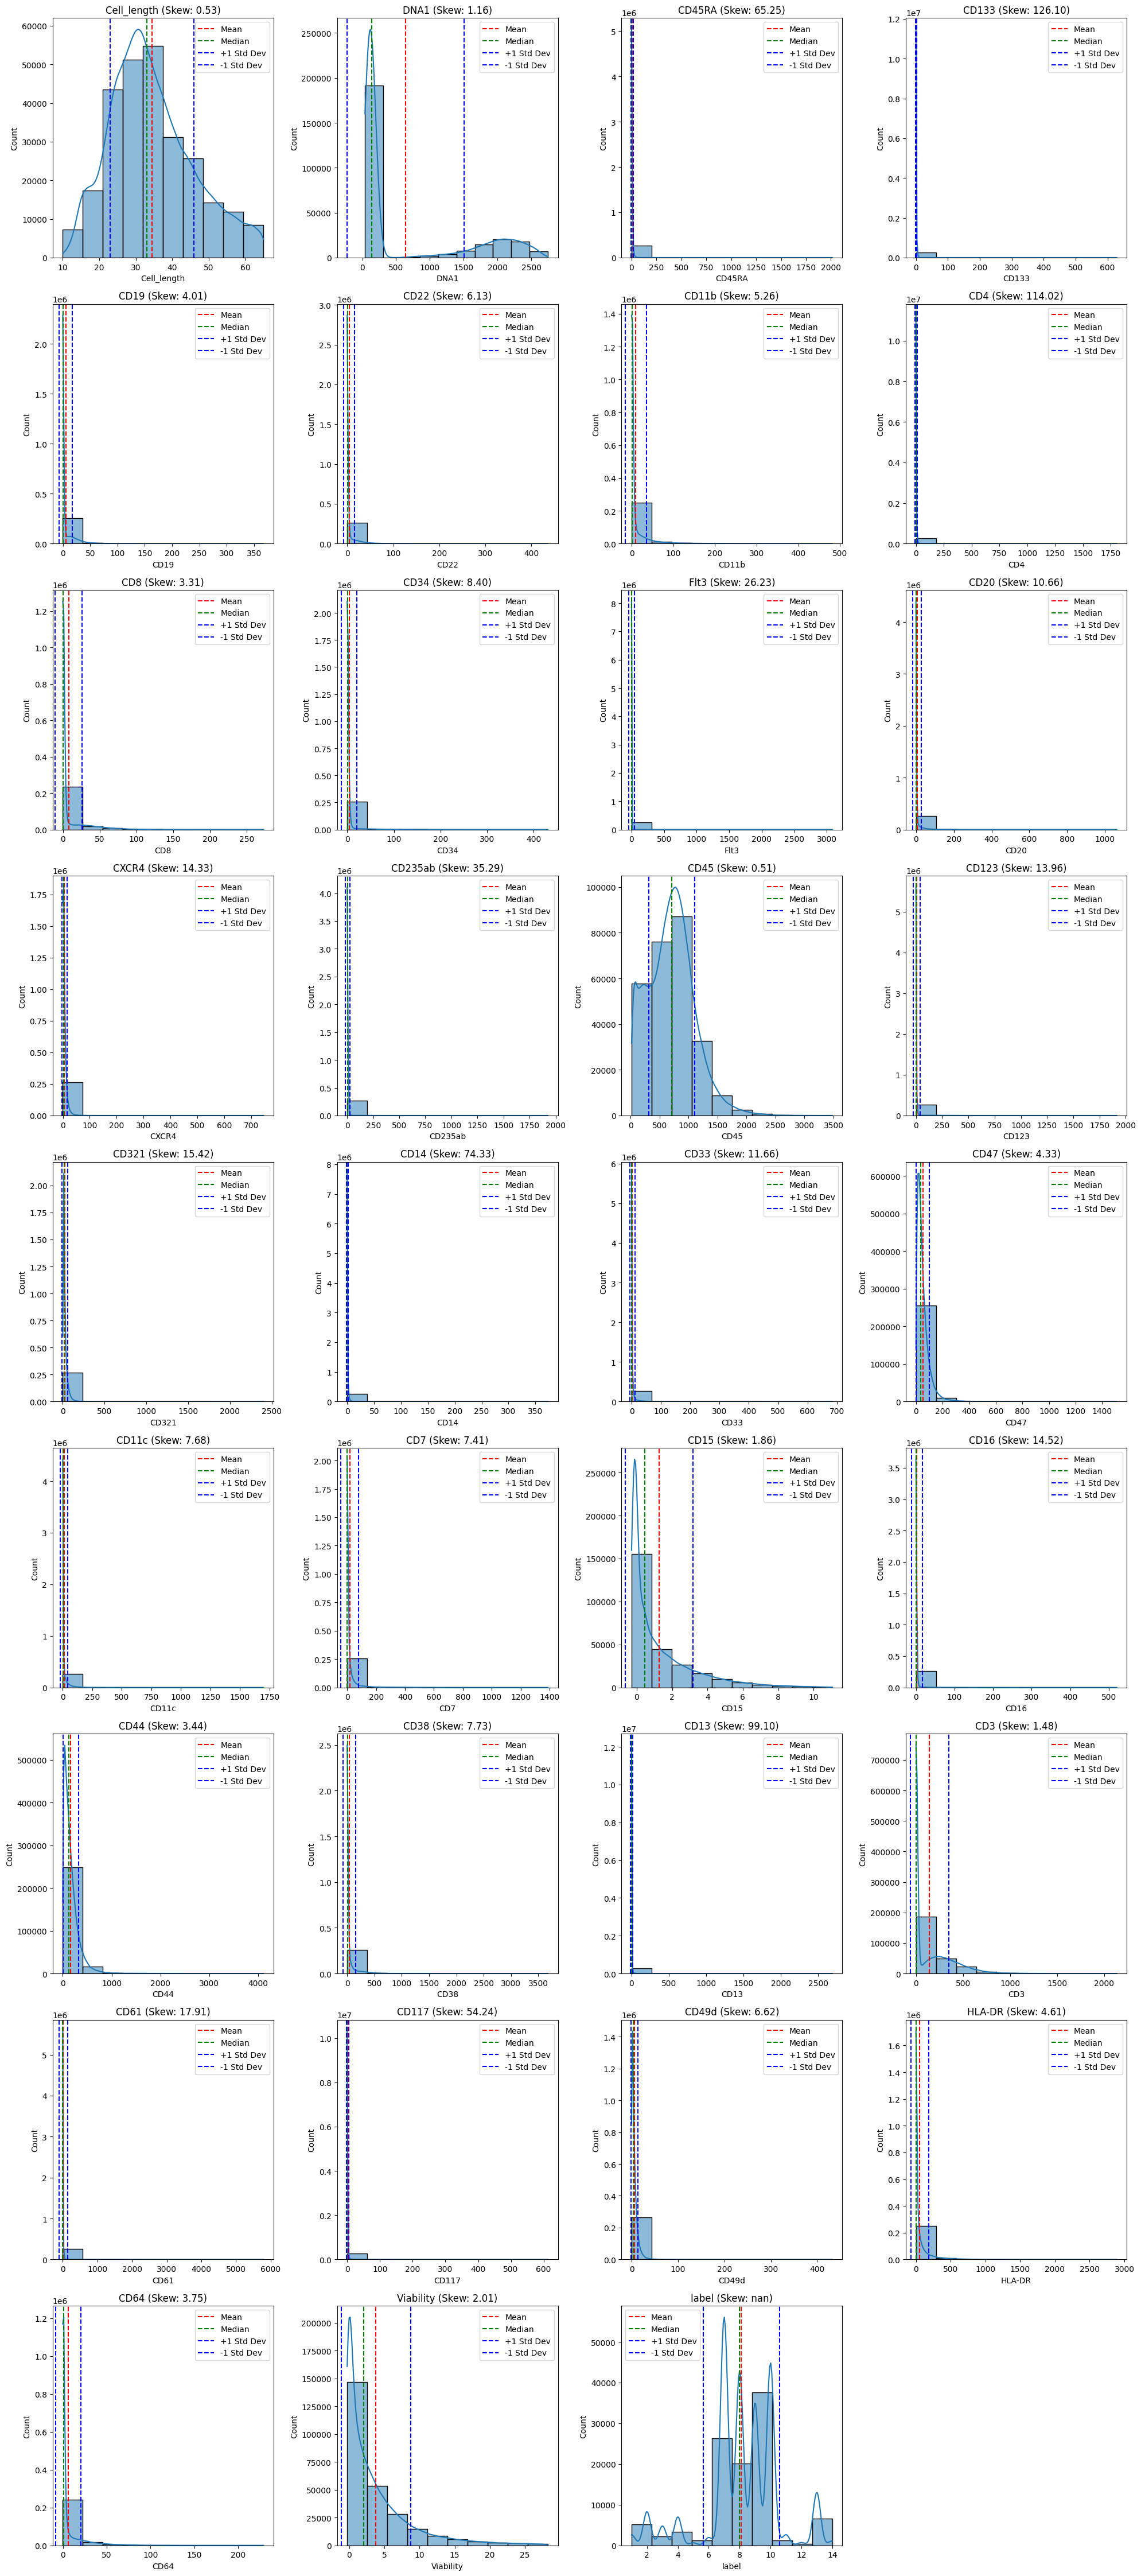

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew


skewness = df_cleaned_after_corr.apply(skew)


def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'


skewness_category = skewness.apply(categorize_skewness)


skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)


n_cols = 4
n_rows = len(df_cleaned_after_corr.columns) // n_cols + (len(df_cleaned_after_corr.columns) % n_cols > 0)


plt.figure(figsize=(20, n_rows * 5))


for i, col in enumerate(df_cleaned_after_corr.columns):
    mean = df_cleaned_after_corr[col].mean()
    median = df_cleaned_after_corr[col].median()
    std_dev = df_cleaned_after_corr[col].std()

    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df_cleaned_after_corr[col], bins=10, kde=True)
    plt.title(f'{col} (Skew: {skewness[col]:.2f})')


    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle='--', label='Median')
    plt.axvline(mean + std_dev, color='blue', linestyle='--', label='+1 Std Dev')
    plt.axvline(mean - std_dev, color='blue', linestyle='--', label='-1 Std Dev')
    plt.legend()


plt.tight_layout()
plt.show()


## Skewness and kurtosis in line graph plot

The skewness and kurtosis are observed w.r.t mean,median and standard deviation

                  Column      Kurtosis                   Category
Cell_length  Cell_length      2.834033  Platykurtic (light tails)
DNA1                DNA1      2.534998  Platykurtic (light tails)
CD45RA            CD45RA   8914.445042  Leptokurtic (heavy tails)
CD133              CD133  39762.277510  Leptokurtic (heavy tails)
CD19                CD19     33.044641  Leptokurtic (heavy tails)
CD22                CD22     76.673855  Leptokurtic (heavy tails)
CD11b              CD11b     41.254044  Leptokurtic (heavy tails)
CD4                  CD4  17443.057242  Leptokurtic (heavy tails)
CD8                  CD8     16.299477  Leptokurtic (heavy tails)
CD34                CD34     95.275706  Leptokurtic (heavy tails)
Flt3                Flt3    862.869549  Leptokurtic (heavy tails)
CD20                CD20    206.215616  Leptokurtic (heavy tails)
CXCR4              CXCR4    577.158590  Leptokurtic (heavy tails)
CD235ab          CD235ab   1785.466381  Leptokurtic (heavy tails)
CD45      

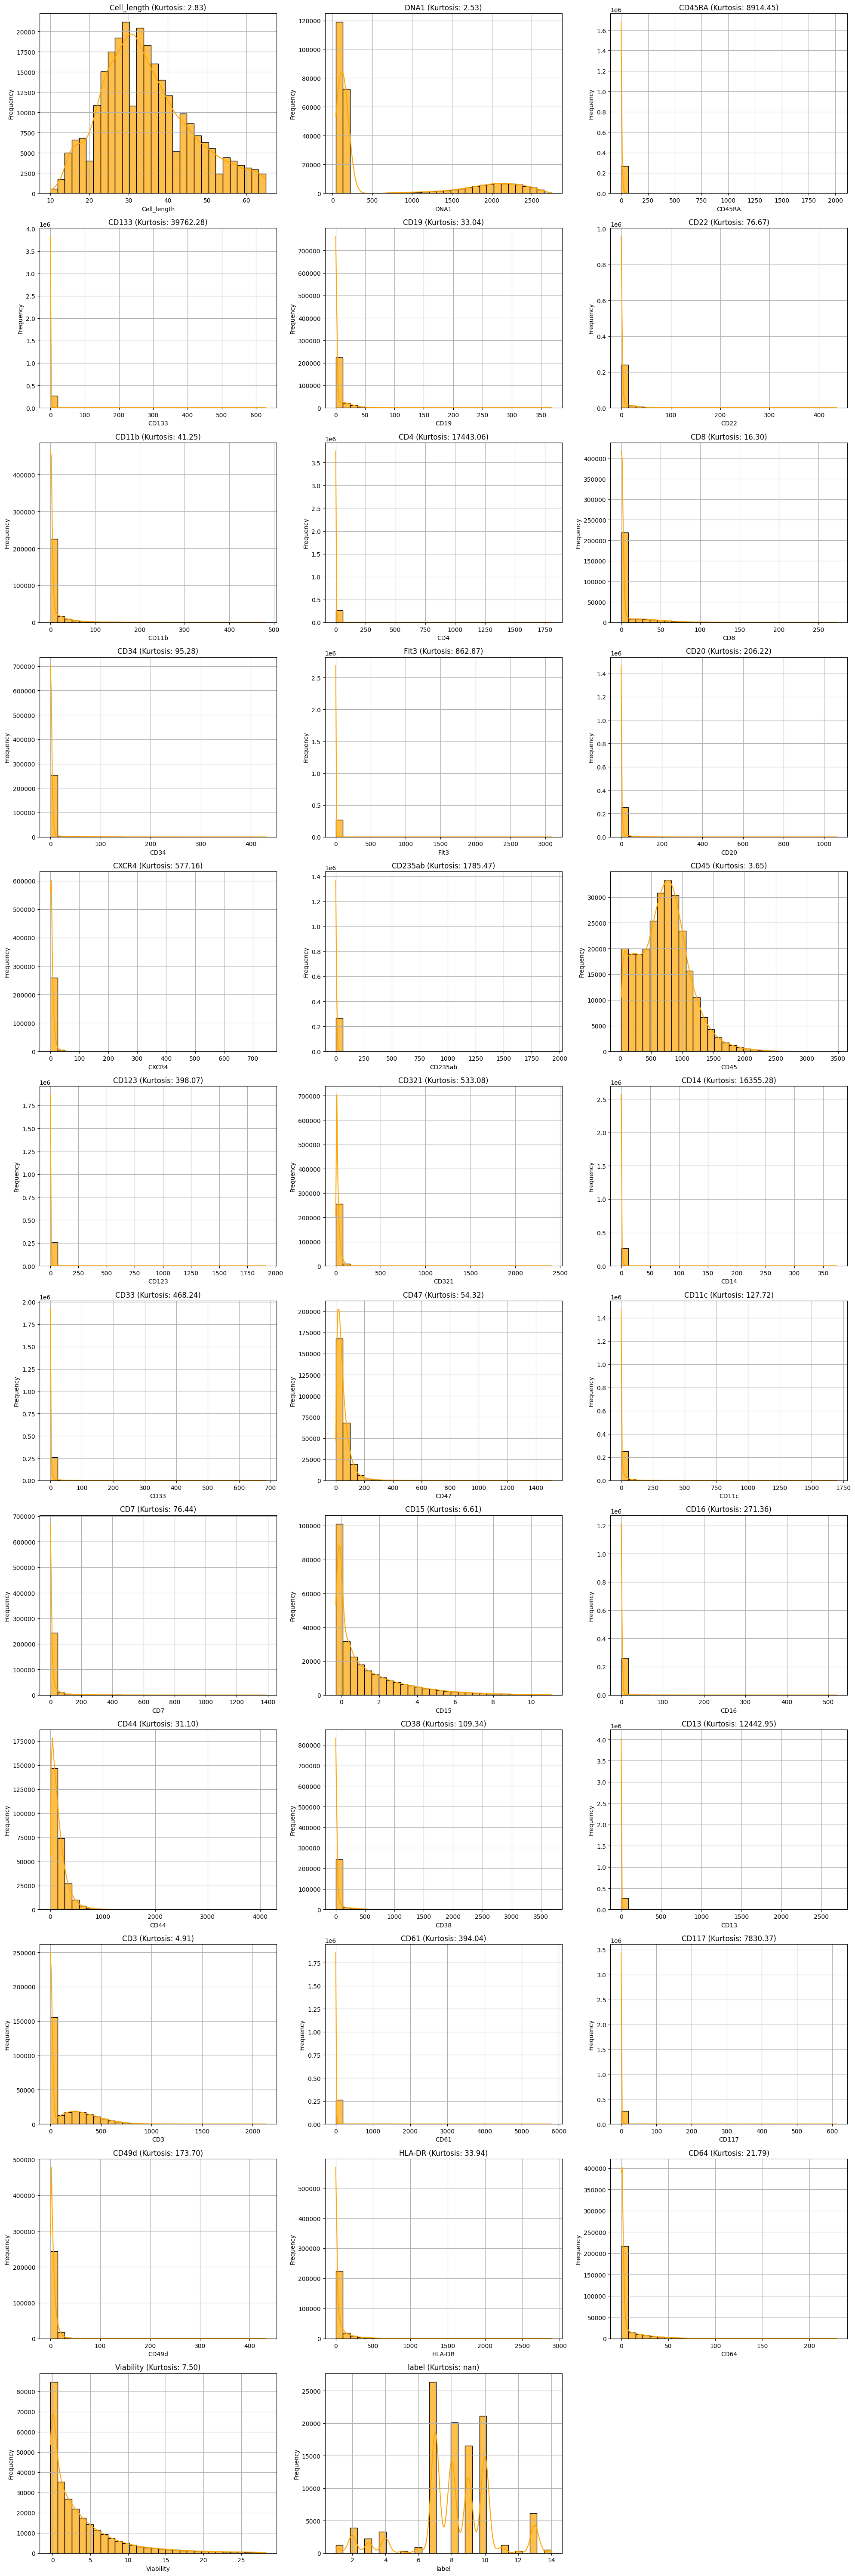

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis


kurtosis_values = df_cleaned_after_corr.apply(kurtosis, fisher=False)  # Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df_cleaned_after_corr.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)


print(kurtosis_df)


n_cols = 3
n_rows = len(df_cleaned_after_corr.columns) // n_cols + (len(df_cleaned_after_corr.columns) % n_cols > 0)


plt.figure(figsize=(20, n_rows * 5))


for i, column in enumerate(df_cleaned_after_corr.columns):
    plt.subplot(n_rows, n_cols, i + 1)


    sns.histplot(df_cleaned_after_corr[column].dropna(), bins=30, color='orange', edgecolor='black', alpha=0.7, kde=True)

    kurt_value = kurtosis_df.loc[kurtosis_df['Column'] == column, 'Kurtosis'].values[0]

    plt.title(f'{column} (Kurtosis: {kurt_value:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)


plt.tight_layout()
plt.show()


In [ ]:


df_cleaned = df_original.drop(columns=[ 'Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual'])


len(df_cleaned.columns)

35

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
features = df_cleaned
labels = df['label']
from sklearn.preprocessing import LabelEncoder
label_cols = ['DNA1', 'DNA2']
le = LabelEncoder()
for col in label_cols:
    features[col] = le.fit_transform(features[col])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
pip install MulticoreTSNE‑0.1_multicore_tsne‑cp36‑cp36m‑win_amd64.whl

ERROR: MulticoreTSNE‑0.1_multicore_tsne‑cp36‑cp36m‑win_amd64.whl is not a valid wheel filename.


In [ ]:
pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.7 MB/s eta 0:00:00


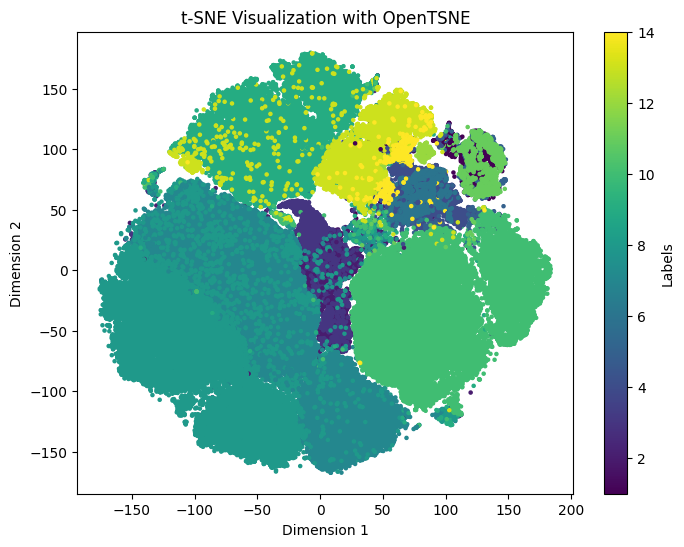

In [ ]:
from openTSNE import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit(scaled_features)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization with OpenTSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(scatter, label='Labels')
plt.show()


    PC  Standard Deviation  Proportion of Variance  Cumulative Proportion
0  PC1            1.801629                0.092739               0.092739
1  PC2            1.635747                0.076447               0.169186
2  PC3            1.611516                0.074199               0.243385
3  PC4            1.548379                0.068499               0.311884


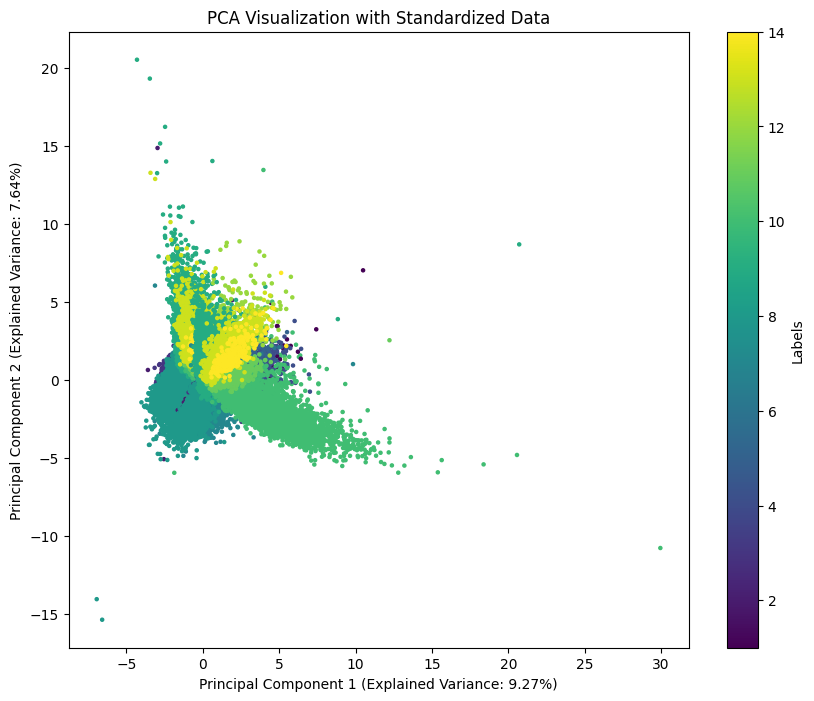

In [ ]:

pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_features)


explained_variance = pca.explained_variance_ratio_
std_deviation = np.sqrt(pca.explained_variance_)
cumulative_variance = np.cumsum(explained_variance)


pca_summary = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(4)],
    'Standard Deviation': std_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})


print(pca_summary)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=5)
plt.title('PCA Visualization with Standardized Data')
plt.xlabel(f'Principal Component 1 (Explained Variance: {explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (Explained Variance: {explained_variance[1]*100:.2f}%)')

plt.colorbar(scatter, label='Labels')
plt.show()


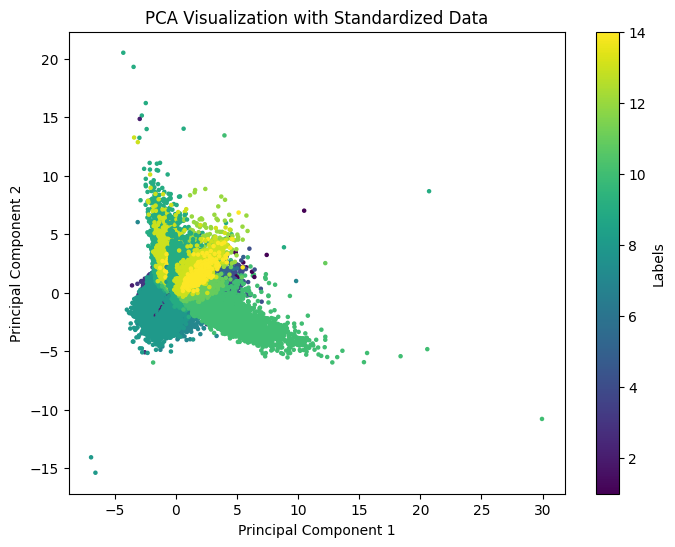

In [ ]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=5)
plt.title('PCA Visualization with Standardized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.colorbar(scatter, label='Labels')
plt.show()

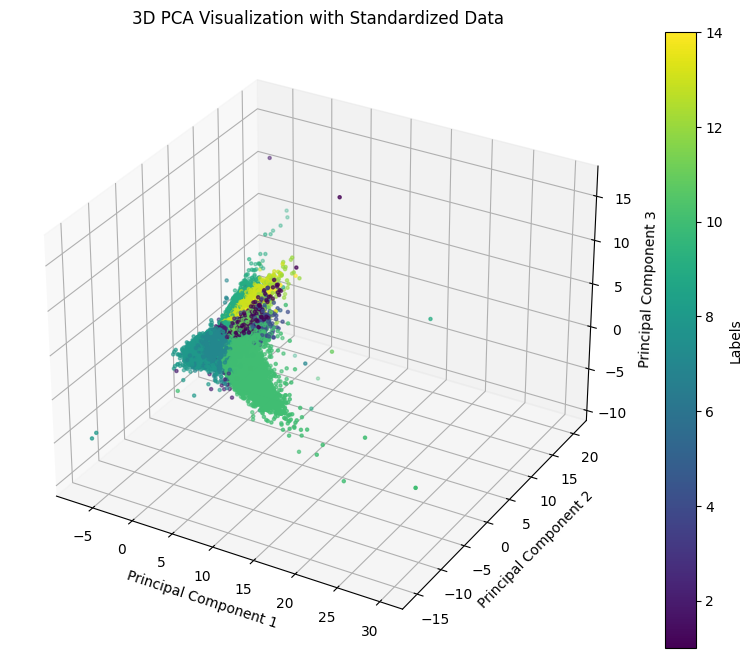

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels, cmap='viridis', s=5)


ax.set_title('3D PCA Visualization with Standardized Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


plt.colorbar(scatter, label='Labels')


plt.show()


In [ ]:
import numpy as np


data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12],
                 [13, 14, 15, 16]])
print("Original Data:\n", data)


keep_probability = 0.3
mask = np.random.choice([0, 1], size=data.shape, p=[ keep_probability,1- keep_probability])
print("\nBinary Mask:\n", mask)


corrupted_data = data * mask
print("\nCorrupted Data:\n", corrupted_data)


Original Data:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Binary Mask:
 [[0 1 1 1]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 1 1]]

Corrupted Data:
 [[ 0  2  3  4]
 [ 5  6  7  0]
 [ 9 10 11 12]
 [ 0 14 15 16]]


In [ ]:
import numpy as np


data = np.array([[5, 6, 7, 8],
                 [1, 2, 3, 4],
                 [9, 10, 11, 12],
                 [13, 14, 15, 16]])


keep_probability = 0.3


mask = mask = np.random.binomial(1, keep_probability, data.shape)


corrupted_data = np.where(mask == 1, data, 0)

print("Original Data:\n", data)
print("Mask:\n", mask)
print("Corrupted Data:\n", corrupted_data)


Original Data:
 [[ 5  6  7  8]
 [ 1  2  3  4]
 [ 9 10 11 12]
 [13 14 15 16]]
Mask:
 [[1 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 1 1]]
Corrupted Data:
 [[ 5  0  0  0]
 [ 0  0  0  0]
 [ 0 10  0  0]
 [ 0  0 15 16]]


In [ ]:
df = df.drop(columns=['Time','file_number', 'event_number'])

len(df.columns)


38

In [ ]:
import numpy as np

data = np.array([
    [1, 6, 11, 16],
    [2, 7, 12, 17],
    [3, 8, 13, 18],
    [4, 9, 14, 19],
    [5, 10, 15, 20]
])
print("Actual Data:\n", data)

# Shuffle the rows
num_rows = data.shape[0]
shuffled_rows = np.random.permutation(num_rows)
shuffled_data = data[shuffled_rows, :]

print("Data after row shuffling:")
print(shuffled_data)


Actual Data:
 [[ 1  6 11 16]
 [ 2  7 12 17]
 [ 3  8 13 18]
 [ 4  9 14 19]
 [ 5 10 15 20]]
Data after row shuffling:
[[ 5 10 15 20]
 [ 3  8 13 18]
 [ 1  6 11 16]
 [ 2  7 12 17]
 [ 4  9 14 19]]


In [ ]:
import numpy as np
import pandas as pd

def create_corrupted_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted

# Sample data
data = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10],
    'C': [11, 12, 13, 14, 15],
    'D': [16, 17, 18, 19, 20]
})

# Call the function
corrupted_data = create_corrupted_data(data, keep_probability=0.6)


Original Data (x):
    A   B   C   D
0  1   6  11  16
1  2   7  12  17
2  3   8  13  18
3  4   9  14  19
4  5  10  15  20

Binary Mask (m):
 [[0 1 1 1]
 [1 1 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [1 1 0 0]]

Shuffled Data (x_shuffled):
    A   B   C   D
0  5  10  15  20
1  3   8  13  18
2  2   7  12  17
3  4   9  14  19
4  1   6  11  16

Corrupted Data (x_corrupted):
    A   B   C   D
0  1  10  15  20
1  3   8  12  17
2  3   8  13  17
3  4   9  14  19
4  1   6  15  20


In [ ]:
corrupted_data = create_corrupted_data(df, keep_probability=0.4)

corrupted_data.head()

Original Data (x):
         Cell_length         DNA1         DNA2     CD45RA     CD133      CD19  \
0                22   201.783295   253.016647   0.817049 -0.147947 -0.033482   
1                35   191.828598   308.869080   3.801385 -0.191446 -0.083274   
2                32   116.111923   200.839218   3.204439 -0.161106  0.369613   
3                29   176.248505   313.022461   2.237382 -0.138071 -0.088311   
4                25   133.332779   226.467758  -0.044047 -0.151509  0.402548   
...             ...          ...          ...        ...       ...       ...   
265622           41  2305.191162  3131.641357  10.345075 -0.095875 -0.278241   
265623           45  2217.376953  3198.114258   0.585101 -0.281215 -0.044320   
265624           41  2455.673340  3157.416260   3.698715 -0.031322 -0.130569   
265625           39  2395.883789  3167.325439   1.463955 -0.056550 -0.244025   
265626           41  2450.653320  3113.955078   1.843143  0.644794 -0.034668   

            CD22   

,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,...,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label,individual
0,22,187.175964,248.357468,3.069993,0.255758,-0.033482,0.332183,51.617840,0.145561,-0.022869,...,-0.163008,-0.014681,-0.178413,4.804858,12.734092,-0.026878,-0.009804,3.474168,NaN,1
1,50,48.587112,308.869080,3.034932,-0.191446,-0.083274,-0.112764,4.494379,-0.146261,0.386942,...,-0.217398,1.724107,0.448901,0.995556,2.558165,0.726602,4.905976,3.782684,12.0,1
2,32,2410.288086,200.839218,-0.105836,-0.255376,0.369613,-0.214952,0.288359,15.234216,-0.028160,...,28.886322,1.299899,-0.131927,-0.092034,8.574364,-0.054804,-0.052067,3.443209,NaN,2
3,33,176.248505,313.022461,2.237382,0.278341,-0.088311,-0.220430,4.006598,-0.095335,0.694267,...,0.302398,1.146695,0.332596,8.879428,0.704930,-0.067247,-0.106680,-0.132632,NaN,1
4,41,127.897987,226.467758,4.491593,-0.151509,0.402548,2.581769,30.599674,2.906627,-0.145833,...,0.688083,0.847043,-0.195557,17.590849,0.993077,44.737946,2.978384,9.134242,1.0,1


In [ ]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[1 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 0 1 0]]

 New Binary Mask (m):
         Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  \
0                 1     1     1       1      1     1     1      1    1    1   
1                 1     1     1       1      1     1     1      1    1    1   
2                 1     1     1       1      1     1     1      1    1    1   
3                 1     1     1       1      1     1     1      1    1    1   
4                 1     1     1       1      1     1     1      1    1    1   
...             ...   ...   ...     ...    ...   ...   ...    ...  ...  ...   
265622            1     1     1       1      1     1     1      1    1    1   
265623            1     1     1       1      1     1     1      1    1    1   
265624            1     1     1       1      1     1     1      1    1    1   
265625            1     1     1       1      1 